In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/avocados/avocados.csv')

In [3]:
df = df.loc[df['region'].isin(['Indianapolis','Orlando','PhoenixTucson'])]

In [4]:
df.groupby('region').mean()['AveragePrice']

region
Indianapolis     1.313994
Orlando          1.506213
PhoenixTucson    1.224438
Name: AveragePrice, dtype: float64

In [6]:
df['RegionsNum']= df['region'].replace(['Indianapolis','Orlando','PhoenixTucson'],[0,1,2])
df = df[['AveragePrice','RegionsNum']]

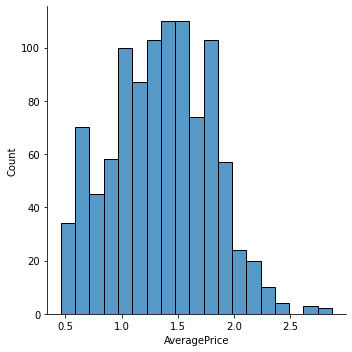

In [8]:
sns.displot(df['AveragePrice'])

In [9]:
scipy.stats.bartlett(df['AveragePrice'], df['RegionsNum'])

BartlettResult(statistic=370.1318985501912, pvalue=1.7517644825407276e-82)

In [10]:
scipy.stats.fligner(df['AveragePrice'], df['RegionsNum'])

FlignerResult(statistic=262.01883292247567, pvalue=6.229672162065104e-59)

In [18]:
postHoc = Multicomparison(df['AveragePrice'], df['RegionsNum'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

NameError: name 'Multicomparison' is not defined

In [ ]:
#stats_model - heteroscedasticity corrected coefficient
#covariance matrix in the .anova_lm()
#f-Oneway

In [17]:
stats.f_oneway(df.loc[df['RegionsNum']==0]["AveragePrice"],
              df.loc[df['RegionsNum']==1]["AveragePrice"],
                    df.loc[df['RegionsNum']==2]["AveragePrice"])

F_onewayResult(statistic=39.27005113498051, pvalue=3.760638188860114e-17)